# Credit card fraud detection

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.value_counts()/df.shape[0]*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.drop('Time',axis =1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X.shape,y.shape

((284807, 29), (284807,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2045,stratify=y)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


keras modeling

In [ ]:
import tensorflow

tensorflow.__version__

'2.5.0'

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

code = models.Sequential()
code.add(layers.Dense(128,activation='relu',input_shape=(29,)))
code.add(layers.Dense(64,activation='relu'))
code.add(layers.Dense(32,activation='relu'))
code.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
code.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


compile

In [ ]:
code.compile(loss='binary_crossentropy',
             optimizer='adam',
            metrics=['Recall'])

fit

In [ ]:
%%time

Hist_code = code.fit(X_train,y_train,
                     epochs=50,batch_size=1024,
                     validation_data=(X_test,y_test))

Epoch 1/50
195/195 [==============================] - 2s 7ms/step - loss: 0.0510 - recall: 0.4448 - val_loss: 0.0060 - val_recall: 0.8311
Epoch 2/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0058 - recall: 0.7238 - val_loss: 0.0707 - val_recall: 0.3176
Epoch 3/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0330 - recall: 0.6483 - val_loss: 0.0052 - val_recall: 0.8311
Epoch 4/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0348 - recall: 0.6395 - val_loss: 0.0038 - val_recall: 0.8041
Epoch 5/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0456 - recall: 0.6599 - val_loss: 0.0041 - val_recall: 0.8243
Epoch 6/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0045 - recall: 0.7762 - val_loss: 0.0043 - val_recall: 0.7095
Epoch 7/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0143 - recall: 0.7384 - val_loss: 0.0042 - val_recall: 0.8378
Epoch 8/50
195/195 [==============

visualization

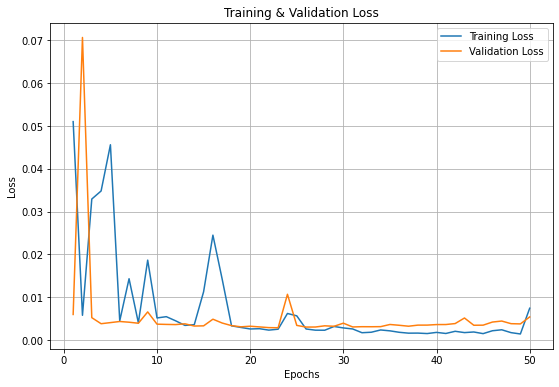

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_code.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_code.history['loss'])
plt.plot(epochs, Hist_code.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

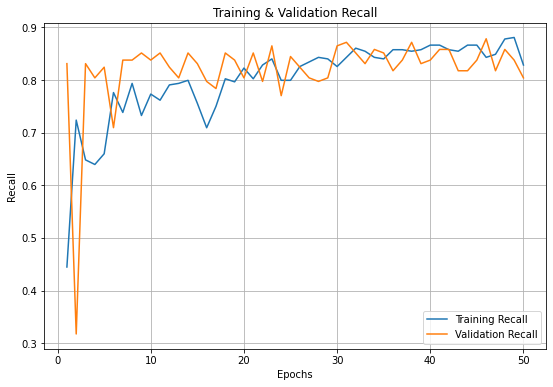

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_code.history['recall']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_code.history['recall'])
plt.plot(epochs, Hist_code.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

In [ ]:
y_hat = code.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_hat)

array([[85270,    25],
       [   29,   119]])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print(accuracy_score(y_test,y_hat))
print(precision_score(y_test,y_hat,pos_label = 1))
print(recall_score(y_test,y_hat,pos_label = 1))

0.9995201479348805
0.9349593495934959
0.777027027027027


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd= RandomForestClassifier(max_depth=5)

In [ ]:
rd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_hat=rd.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_hat)

array([[85287,     8],
       [   33,   115]])

In [ ]:
print(accuracy_score(y_test,y_hat))
print(precision_score(y_test,y_hat,pos_label = 1))
print(recall_score(y_test,y_hat,pos_label = 1))

0.9995201479348805
0.9349593495934959
0.777027027027027
